In [1]:
import pandas as pd
from datetime import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# coLLECTING DATA FROM ISRO.GOV
communication = pd.read_html("https://www.isro.gov.in/applications/satellites-communication")
navigation = pd.read_html("https://www.isro.gov.in/applications/satellites-navigation")

In [ ]:
print(communication[0])
print(navigation[0])

In [ ]:
#communication[0].to_csv("communication.csv")
#navigation[0].to_csv("navigation.csv")

In [2]:
df_comm = pd.read_csv("communication.csv")
df_navi = pd.read_csv("navigation.csv")

In [3]:
# CONCATNATING THE ALL FILES TO ONE FILE NAMED "RESULT"
frames = [df_comm,df_navi]
isro_app = pd.concat(frames,axis=0,sort=False)

In [4]:
# Dropping unwanted columns
isro_app.drop(columns=["Unnamed: 0","Unnamed: 0.1","Launch Mass"],inplace=True)
# renaming the col names
isro_app.rename(index = str, columns={"Launch Date":"Launch_Date","Launch Vehicle":"Launch_Vehicle",
                                     "Orbit Type":"Orbit_Type"},inplace=True)

In [5]:
isro_app.head()

,Launch_Date,Launch_Vehicle,Orbit_Type,Application,Remarks
0,"Dec 19, 2018",GSLV-F11 / GSAT-7A Mission,NaN,Communication,NaN
1,"Dec 05, 2018",Ariane-5 VA-246,GTO,Communication,NaN
2,"Nov 14, 2018",GSLV Mk III-D2 / GSAT-29 Mission,GTO,Communication,NaN
3,"Mar 29, 2018",GSLV-F08/GSAT-6A Mission,GSO,Communication,NaN
4,"Jun 29, 2017",Ariane-5 VA-238,GTO,Communication,NaN


In [6]:
isro_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 11
Data columns (total 5 columns):
Launch_Date       53 non-null object
Launch_Vehicle    53 non-null object
Orbit_Type        51 non-null object
Application       53 non-null object
Remarks           7 non-null object
dtypes: object(5)
memory usage: 2.5+ KB


In [7]:
isro_app.isnull().sum()

Launch_Date        0
Launch_Vehicle     0
Orbit_Type         2
Application        0
Remarks           46
dtype: int64

In [8]:
# CHANGING THE DATE COLUMN
isro_app["Launch_Date"] = isro_app["Launch_Date"].astype("datetime64[ns]")
# REPLACING THE NAN VALUES
isro_app.Remarks.fillna("Mission successful",inplace=True)
isro_app["Orbit_Type"].fillna(method="ffill",inplace=True)

In [9]:
isro_app["Name"],isro_app["Model"] = isro_app["Launch_Vehicle"].str.split("-",1).str

In [10]:
isro_app["year"] = isro_app["Launch_Date"].dt.year
isro_app["month"] = isro_app["Launch_Date"].dt.month

In [11]:
# Dropping unwanted columns
isro_app.drop(columns=["Launch_Vehicle","Model"],inplace=True)

In [12]:
isro_app.head()

,Launch_Date,Orbit_Type,Application,Remarks,Name,year,month
0,2018-12-19,NaN,Communication,Mission successful,GSLV,2018,12
1,2018-12-05,GTO,Communication,Mission successful,Ariane,2018,12
2,2018-11-14,GTO,Communication,Mission successful,GSLV Mk III,2018,11
3,2018-03-29,GSO,Communication,Mission successful,GSLV,2018,3
4,2017-06-29,GTO,Communication,Mission successful,Ariane,2017,6


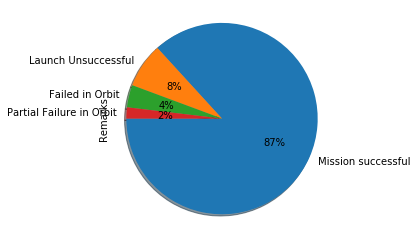

In [13]:
isro_app.Remarks.value_counts().plot(kind="pie",startangle = 180,radius=1.10,autopct="%0.0f%%",shadow=True)

In [14]:
isro_app.to_csv("isro_ap.csv")

In [15]:
isro_app.Application.unique()

array(['Communication', 'Communication, Navigation',
       'Climate & Environment, Communication',
       'Communication, Experimental', 'Navigation'], dtype=object)